C:\Users\85059\AppData\Local\Temp\ipykernel_20900\1380040088.py:29: UserWarning: No contour levels were found within the data range.
  ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


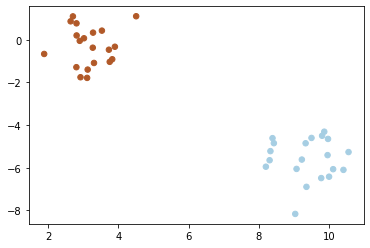

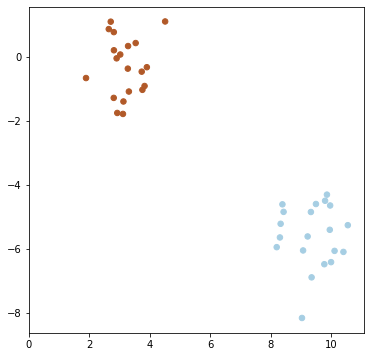

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.datasets import make_blobs 

# we create 40 separable points 
X, y = make_blobs(n_samples=40, centers=2, cluster_std=1) 

# fit the model, don't regularize for illustration purposes 
my_svm = svm.SVC(kernel='linear', C=10) 
my_svm.fit(X, y) 

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) 

# plot the decision function 
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1 = plt.gca() 
xlim = ax1.get_xlim() 
ylim = ax1.get_ylim()

# create grid to evaluate model 
xx = np.linspace(xlim[0], xlim[1], 30) 
yy = np.linspace(ylim[0], ylim[1], 30) 
YY, XX = np.meshgrid(yy, xx) 
xy = np.vstack([XX.ravel(), YY.ravel()]).T 
Z = my_svm.decision_function(xy).reshape(XX.shape) 

# plot decision boundary and margins 
ax1.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']) 

# plot support vectors 
ax1.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired) 
plt.show()

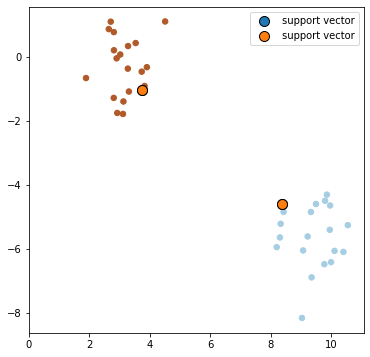

In [10]:
# check the support vectors
my_svm.support_vectors_
# plot the support vectors on top of the original data
ax1.scatter(my_svm.support_vectors_[:,0], my_svm.support_vectors_[:,1], s=100, linewidths=1, edgecolors='k', label='support vector')
ax1.legend()
fig1

Change the code to construct data that is not linearly separable (i.e. the two classes overlap slightly).

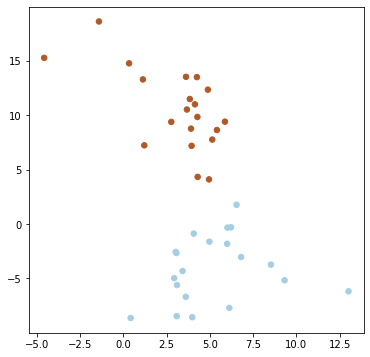

In [11]:
# create 40 slightly inseparable points by increasing the cluster standard, deviation
X2, y2 = make_blobs(n_samples=40, centers=2, cluster_std=3, random_state=617)
fig2, ax2 = plt.subplots(figsize=(6,6))
plt.scatter(X2[:,0], X2[:,1], c=y2, s=30, cmap=plt.cm.Paired)

Trying different values of C to train an SVM on the new data

In [13]:
def train_svm(X, y, kernal='linear', C=10):
    my_svm = svm.SVC(kernel=kernal, C=C)
    my_svm.fit(X, y)
    return my_svm

NameError: name 'create_grid' is not defined

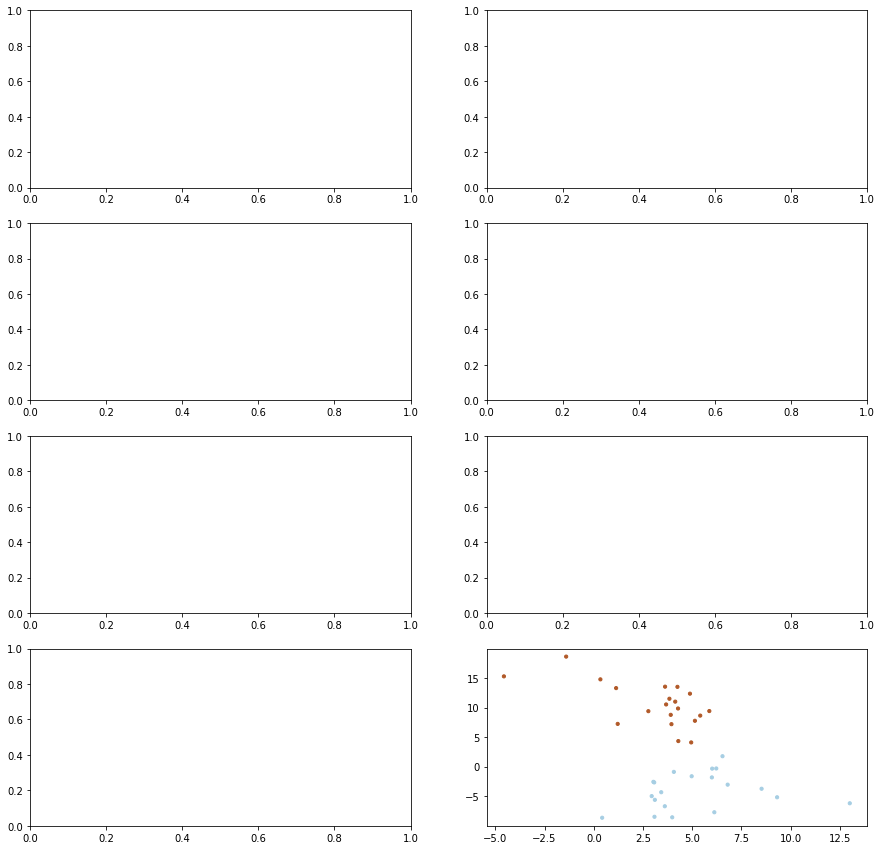

In [14]:
fig, axs = plt.subplots(4,2,figsize=(15,15))
axs = axs.ravel()
# range of C values
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 100000]
for i in range(len(C)):
    my_svm = train_svm(X2, y2, kernal='linear', C=C[i])
    plt.scatter(X2[:,0], X2[:,1], c=y2, s=10, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    XX, YY, Z = create_grid(xlim, ylim, my_svm)
    axs[i].scatter(X2[:,0], X2[:,1],c=y2,s=30,cmap=plt.cm.Paired)
    axs[i].contour(XX, YY, Z, color ='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    axs[i].scatter(my_svm.support_vectors_[:,0], my_svm.support_vectors_[:,1], s=100, linewidth=1, facecolors='none',edgecolors='k')

    axs[i].set_title("C={}".format(c[i]))

plt.show()